# Day 11
batch size 256 lr 1e-3, normed weighted, non-rotated, cartesian, SWA test

### Import modules

In [1]:
%matplotlib inline
from __future__ import division
import sys
import os
os.environ['MKL_THREADING_LAYER']='GNU'
sys.path.append('../')
from Modules.Basics import *
from Modules.Class_Basics import *

/home/giles/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/giles/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
Using TensorFlow backend.


## Options

In [2]:
classTrainFeatures = ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_met_pt', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_all_pt', 'PRI_tau_px', 'PRI_tau_py', 'PRI_tau_pz', 'PRI_lep_px', 'PRI_lep_py', 'PRI_lep_pz', 'PRI_jet_leading_px', 'PRI_jet_leading_py', 'PRI_jet_leading_pz', 'PRI_jet_subleading_px', 'PRI_jet_subleading_py', 'PRI_jet_subleading_pz', 'PRI_met_px', 'PRI_met_py']
classModel = 'modelSwish'
varSet = "basic_features"

nSplits = 10
ensembleSize = 10
ensembleMode = 'loss'

maxEpochs = 200
compileArgs = {'loss':'binary_crossentropy', 'optimizer':'sgd', 'momentum':0.9}
trainParams = {'epochs' : 1, 'batch_size' : 256, 'verbose' : 0}
modelParams = {'version':classModel, 'nIn':len(classTrainFeatures), 'compileArgs':compileArgs, 'mode':'classifier'}

print ("\nTraining on", len(classTrainFeatures), "features:", [var for var in classTrainFeatures])


Training on 31 features: ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_met_pt', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_all_pt', 'PRI_tau_px', 'PRI_tau_py', 'PRI_tau_pz', 'PRI_lep_px', 'PRI_lep_py', 'PRI_lep_pz', 'PRI_jet_leading_px', 'PRI_jet_leading_py', 'PRI_jet_leading_pz', 'PRI_jet_subleading_px', 'PRI_jet_subleading_py', 'PRI_jet_subleading_pz', 'PRI_met_px', 'PRI_met_py']


## Import data

In [3]:
with open(dirLoc + 'inputPipe.pkl', 'rb') as fin:
    inputPipe = pickle.load(fin)

In [4]:
trainData = RotationReflectionBatch(classTrainFeatures, h5py.File(dirLoc + 'train.hdf5', "r+"),
                                    inputPipe=inputPipe, augRotMult=16)

## Determine LR

2 classes found, running in binary mode


______________________________________
Training finished
Cross-validation took 1.322s 


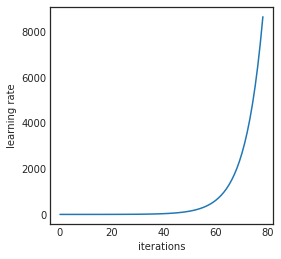

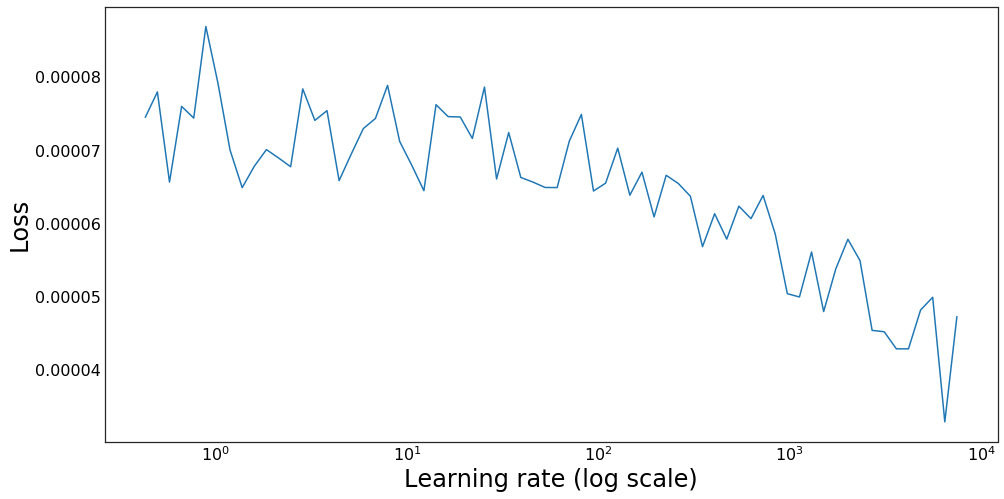

______________________________________



In [16]:
lrFinder = batchLRFind(trainData, getModel, modelParams, trainParams,
                       lrBounds=[1e-1,1e4], trainOnWeights=True, verbose=0)

In [5]:
compileArgs['lr'] = 5e2

## Train classifier

Using cosine annealing
Training using weights
Running fold 1 / 10
2 classes found, running in binary mode

1 New best found: 4.3089331112033015e-05
2 New best found: 3.9235533258236525e-05
3 New best found: 3.811500105802652e-05
4 New best found: 3.7284331322833926e-05
5 New best found: 3.6631739557295126e-05
6 New best found: 3.639951139225463e-05
7 New best found: 3.611544017561913e-05
8 New best found: 3.57790615049382e-05
9 New best found: 3.573689368200149e-05
10 New best found: 3.529896968985054e-05
12 New best found: 3.5185436760197205e-05
13 New best found: 3.501372443799249e-05
14 New best found: 3.492132187535234e-05
15 New best found: 3.481929701270308e-05
16 New best found: 3.4803168677833256e-05
18 New best found: 3.4570251079564416e-05
19 New best found: 3.437802290460247e-05
20 New best found: 3.431608152181284e-05
25 New best found: 3.4249060215048676e-05
26 New best found: 3.4235782517778744e-05
27 New best found: 3.4092225330241836e-05
28 New best found: 3.39419971051

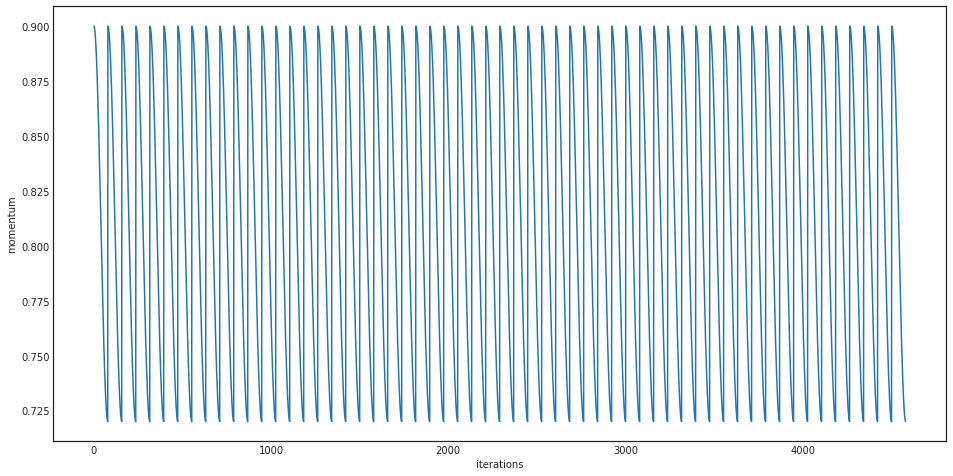

Fold took 59.690s

Running fold 2 / 10
1 New best found: 4.118404389250197e-05
2 New best found: 3.866445639690073e-05
3 New best found: 3.726120814882849e-05
4 New best found: 3.6843474058144485e-05
5 New best found: 3.6369462834805614e-05
6 New best found: 3.6023526046676045e-05
7 New best found: 3.5588180870459904e-05
8 New best found: 3.544898651167103e-05
9 New best found: 3.531094605969973e-05
10 New best found: 3.4887103097138845e-05
11 New best found: 3.4796508865288005e-05
14 New best found: 3.465045904010265e-05
15 New best found: 3.4406329077960874e-05
17 New best found: 3.433297216142329e-05
19 New best found: 3.423767370384915e-05
21 New best found: 3.413638930844741e-05
23 New best found: 3.4042868435986376e-05
25 New best found: 3.3953538942074784e-05
26 New best found: 3.394423095095924e-05
27 New best found: 3.384189595266862e-05
Early stopping after 32 epochs
Score is: {'loss': 3.384189595266862e-05, 'wAUC': 0.07273362522206761, 'AUC': 0.11937089220605868}


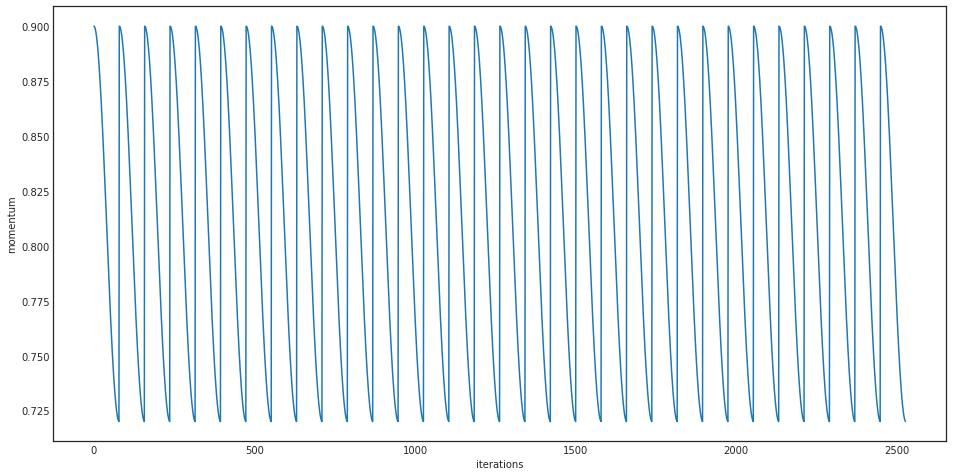

Fold took 35.551s

Running fold 3 / 10
1 New best found: 4.28762309700002e-05
2 New best found: 3.959756460073049e-05
3 New best found: 3.7568786071307076e-05
4 New best found: 3.6629392858828095e-05
5 New best found: 3.6160501238529015e-05
6 New best found: 3.590168964016852e-05
7 New best found: 3.5629627821386615e-05
8 New best found: 3.5375521753610124e-05
9 New best found: 3.5130975875337296e-05
10 New best found: 3.5034985182751944e-05
11 New best found: 3.4863000716226606e-05
12 New best found: 3.483939380790405e-05
13 New best found: 3.4659813784479746e-05
14 New best found: 3.452237385561272e-05
16 New best found: 3.431534718674843e-05
18 New best found: 3.4122035425743254e-05
20 New best found: 3.400695360412951e-05
22 New best found: 3.395910582145372e-05
23 New best found: 3.3819830496400745e-05
26 New best found: 3.3768945866295884e-05
28 New best found: 3.3657023094451745e-05
31 New best found: 3.358356124542336e-05
34 New best found: 3.343538340362414e-05
38 New best fou

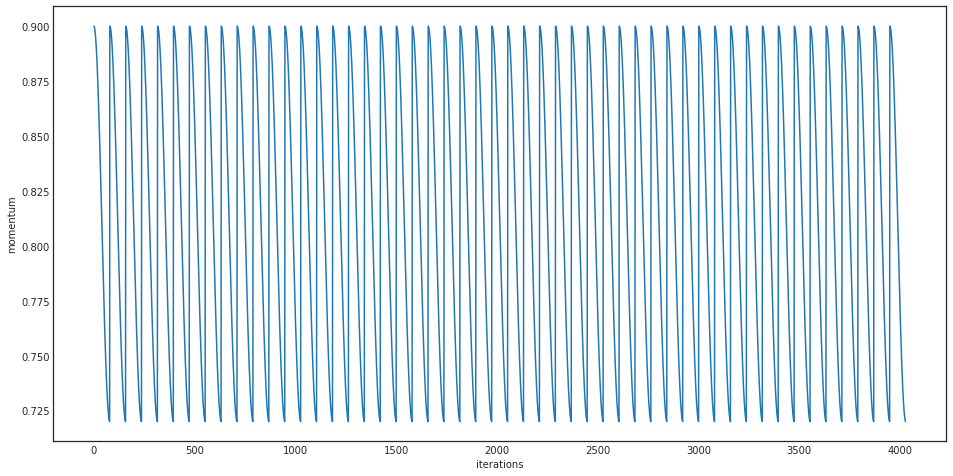

Fold took 55.773s

Running fold 4 / 10
1 New best found: 4.1390781008522024e-05
2 New best found: 3.841146660997765e-05
3 New best found: 3.708079324715072e-05
4 New best found: 3.636314842879074e-05
5 New best found: 3.5810661691357384e-05
6 New best found: 3.537641462025931e-05
7 New best found: 3.5073216579621656e-05
8 New best found: 3.4974839312781115e-05
9 New best found: 3.475919746560976e-05
10 New best found: 3.468528778903419e-05
11 New best found: 3.454172443161952e-05
12 New best found: 3.43451026128605e-05


KeyboardInterrupt: 

In [6]:
results, histories = batchTrainClassifier(trainData, nSplits, getModel, modelParams, trainParams, swaStart=-1,
                                          patience=5, cosAnnealMult=1, reduxDecay=False, trainOnWeights=True,
                                          annealMomentum=True, plotMomentum =True, mode='sgd',
                                          maxEpochs=maxEpochs, verbose=1)

## Construct ensemble

In [5]:
with open('train_weights/resultsFile.pkl', 'r') as fin:   
    results = pickle.load(fin)

In [6]:
ensemble, weights = assembleEnsemble(results, ensembleSize, ensembleMode, compileArgs)

Choosing ensemble by loss
Model 0 is 1 with loss = 3.081834277645131e-05
Model 1 is 5 with loss = 3.0872881186835534e-05
Model 2 is 7 with loss = 3.1133123032824354e-05
Model 3 is 0 with loss = 3.124075680919089e-05
Model 4 is 4 with loss = 3.1504365232901894e-05
Model 5 is 2 with loss = 3.179996855352909e-05
Model 6 is 6 with loss = 3.2064552728697566e-05
Model 7 is 8 with loss = 3.231228751051368e-05
Model 8 is 3 with loss = 3.2595311997671726e-05
Model 9 is 9 with loss = 3.3109084638750596e-05


## Response on validation data base

In [9]:
valData = BatchYielder(h5py.File(dirLoc + 'val.hdf5', "r+"))

In [10]:
batchEnsemblePredict(ensemble, weights, valData, ensembleSize=10, verbose=0)

In [11]:
print 'Testing ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(getFeature('targets', valData.source), getFeature('pred', valData.source)),
                                                           roc_auc_score(getFeature('targets', valData.source), getFeature('pred', valData.source), sample_weight=getFeature('weights', valData.source)))

Testing ROC AUC: unweighted 0.902130162544, weighted 0.935563415312


In [12]:
amsScanQuick(convertToDF(valData.source))

50000 candidates loaded
3.871075357519875 0.9559333


(3.871075357519875, 0.9559333)

## Response on validation data merged

In [51]:
merged = getModel(**modelParams)

In [52]:
mergedParams = merged.get_weights()
for param in mergedParams:
    param.fill(0)

In [53]:
for model, weight in zip(ensemble, weights):
    for param, modParam in zip(mergedParams, model.get_weights()):
        param += modParam

In [54]:
for param in mergedParams:
    param /= 10

In [55]:
merged.set_weights(mergedParams)

In [56]:
valData = BatchYielder(h5py.File(dirLoc + 'val.hdf5', "r+"))

In [57]:
batchEnsemblePredict([merged], np.array([1]), valData, ensembleSize=1, verbose=0)

In [58]:
print 'Testing ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(getFeature('targets', valData.source), getFeature('pred', valData.source)),
                                                           roc_auc_score(getFeature('targets', valData.source), getFeature('pred', valData.source), sample_weight=getFeature('weights', valData.source)))

Testing ROC AUC: unweighted 0.483388859656, weighted 0.595265045494


In [59]:
amsScanQuick(convertToDF(valData.source))

50000 candidates loaded
1.0867271622808339 0.48827246


(1.0867271622808339, 0.48827246)